In [1]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

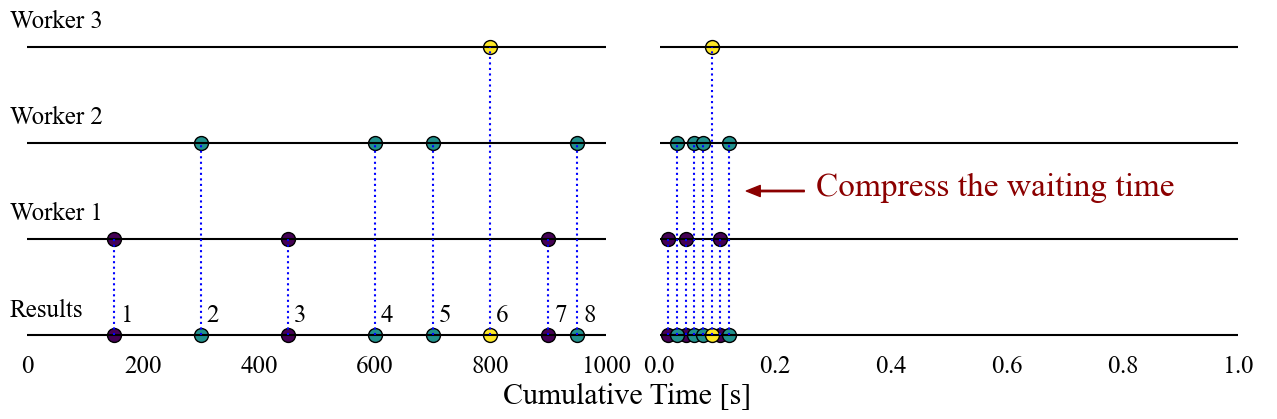

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 4), gridspec_kw=dict(wspace=0.04))

def plot_worker_order(ax, xs, text: bool = True, s=100, x_factor=1):
    xmax = 1000 * x_factor

    ax.tick_params(left=False, bottom=False, labelleft=False)
    ax.hlines([0, 1, 2, 3], 0, xmax, color="black")
    ax.hlines([-1], 0, xmax, color="black", linestyle="dotted")

    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

    X = []

    cm = plt.get_cmap()
    colors = [cm(i / 2) for i in range(3)]
    for i, (x, color) in enumerate(zip(xs, colors), start=1):
        y = [i] * len(x)
        if text:
            ax.text(-30 * x_factor, i + 0.2, f"Worker {i}")
        
        x_factored = [v * x_factor for v in x]
        ax.vlines(x_factored, 0, i, color="blue", linestyle="dotted")
        ax.scatter(x_factored, y, color=color, s=s, facecolor=color, edgecolor="black")
        ax.scatter(x_factored, [0] * len(x), color=color, s=s, facecolor=color, edgecolor="black")
        X += x_factored

    X_sorted = np.sort(X)
    if text:
        for i, x in enumerate(X_sorted, start=1):
            ax.text((x + 10) * x_factor, 0.15, str(i))

    if text:
        ax.text(-30 * x_factor, 0.2, "Results")
    if x_factor < 0.1:
        ax.ticklabel_format(style="sci", scilimits=(0,0), axis="x", useMathText=True)

    ax.set_xlim(0, xmax + 50 * x_factor)
    ax.set_ylim(-0.1, 3.1)


xs = [
    [150, 450, 900],
    [300, 600, 700, 950],
    [800],
]
plot_worker_order(axes[0], xs)

factor = 15
xs = [
    [i * factor for i in [1, 3, 7]],
    [i * factor for i in [2, 4, 5, 8]],
    [i * factor for i in [6]],
]
ax = axes[1]
x_factor = 1e-3
plot_worker_order(ax, xs, text=False, x_factor=x_factor)
ax.annotate(
    "",
    xy=(150 * x_factor, 1.5),
    xytext=(250 * x_factor, 1.5),
    arrowprops=dict(
        shrink=0,
        width=1,
        headwidth=8,
        headlength=10,
        connectionstyle="arc3",
        facecolor="darkred",
        edgecolor="darkred",
    )
)
ax.text(270 * x_factor, 1.45, "Compress the waiting time", fontsize=24, color="darkred")

fig.supxlabel("Cumulative Time [s]", y=-0.05)

plt.savefig("compress-conceptual.png", bbox_inches="tight")

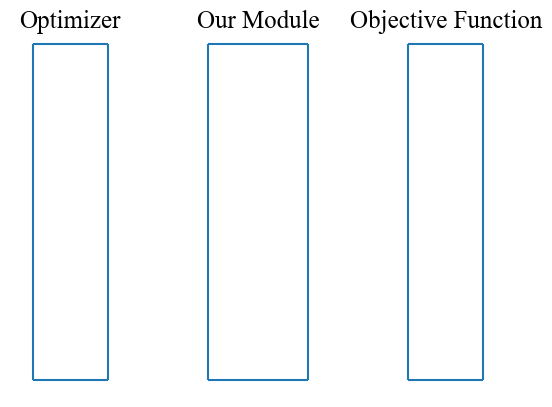

In [55]:
fig, ax = plt.subplots()

ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

width = 1.5
buffer = 2
Y = 1.1

x1, x2, x3, x4 = -1 - width - buffer, -1 - buffer, 1 + buffer, 1 + width + buffer

ax.text(0, Y, "Our Module", horizontalalignment='center')
ax.text((x1 + x2) / 2, Y, "Optimizer", horizontalalignment='center')
ax.text((x3 + x4) / 2, Y, "Objective Function", horizontalalignment='center')

ax.hlines([-1, 1], -1, 1)
ax.vlines([-1, 1], -1, 1)

ax.hlines([-1, 1], x1, x2)
ax.vlines([x1, x2], -1, 1)

ax.hlines([-1, 1], x3, x4)
ax.vlines([x3, x4], -1, 1)